In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\nihal\\OneDrive\\Desktop\\btc_day.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape

(2484, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2.484000e+03
mean,8004.767259,8234.054778,7749.560913,8016.880242,8016.880242,1.295561e+10
std,12024.187508,12401.154351,11574.757820,12031.850422,12031.850422,1.982770e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,528.222504,542.398010,518.541245,531.049484,531.049484,6.944417e+07
50%,4510.564941,4628.080078,4348.054932,4572.034912,4572.034912,4.142622e+09
75%,9291.430420,9452.106445,9139.054688,9296.048584,9296.048584,1.955353e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2484 non-null   object 
 1   Open       2484 non-null   float64
 2   High       2484 non-null   float64
 3   Low        2484 non-null   float64
 4   Close      2484 non-null   float64
 5   Adj Close  2484 non-null   float64
 6   Volume     2484 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.0+ KB


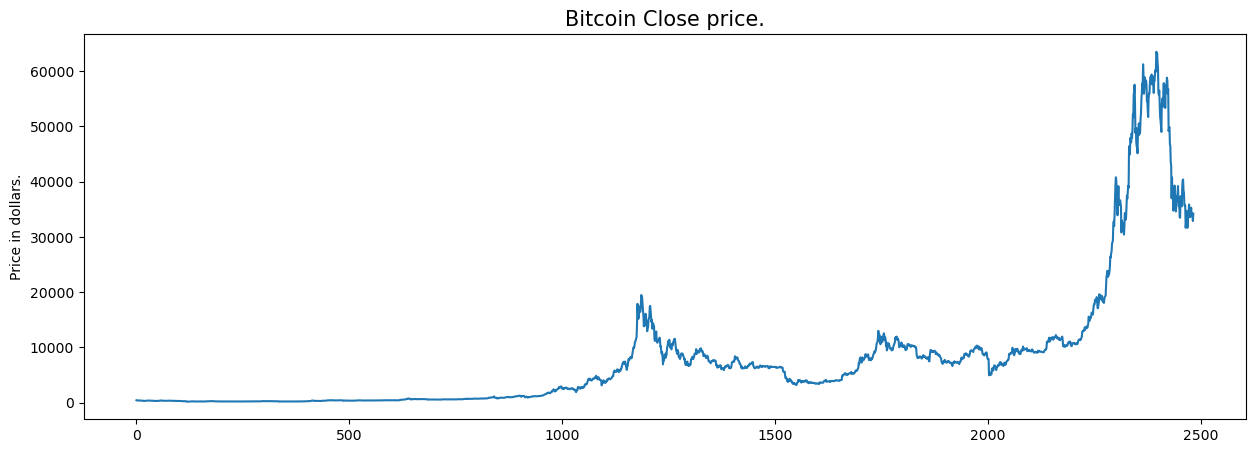

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [8]:
df[df['Close'] == df['Adj Close']].shape,df.shape

((2484, 7), (2484, 7))

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

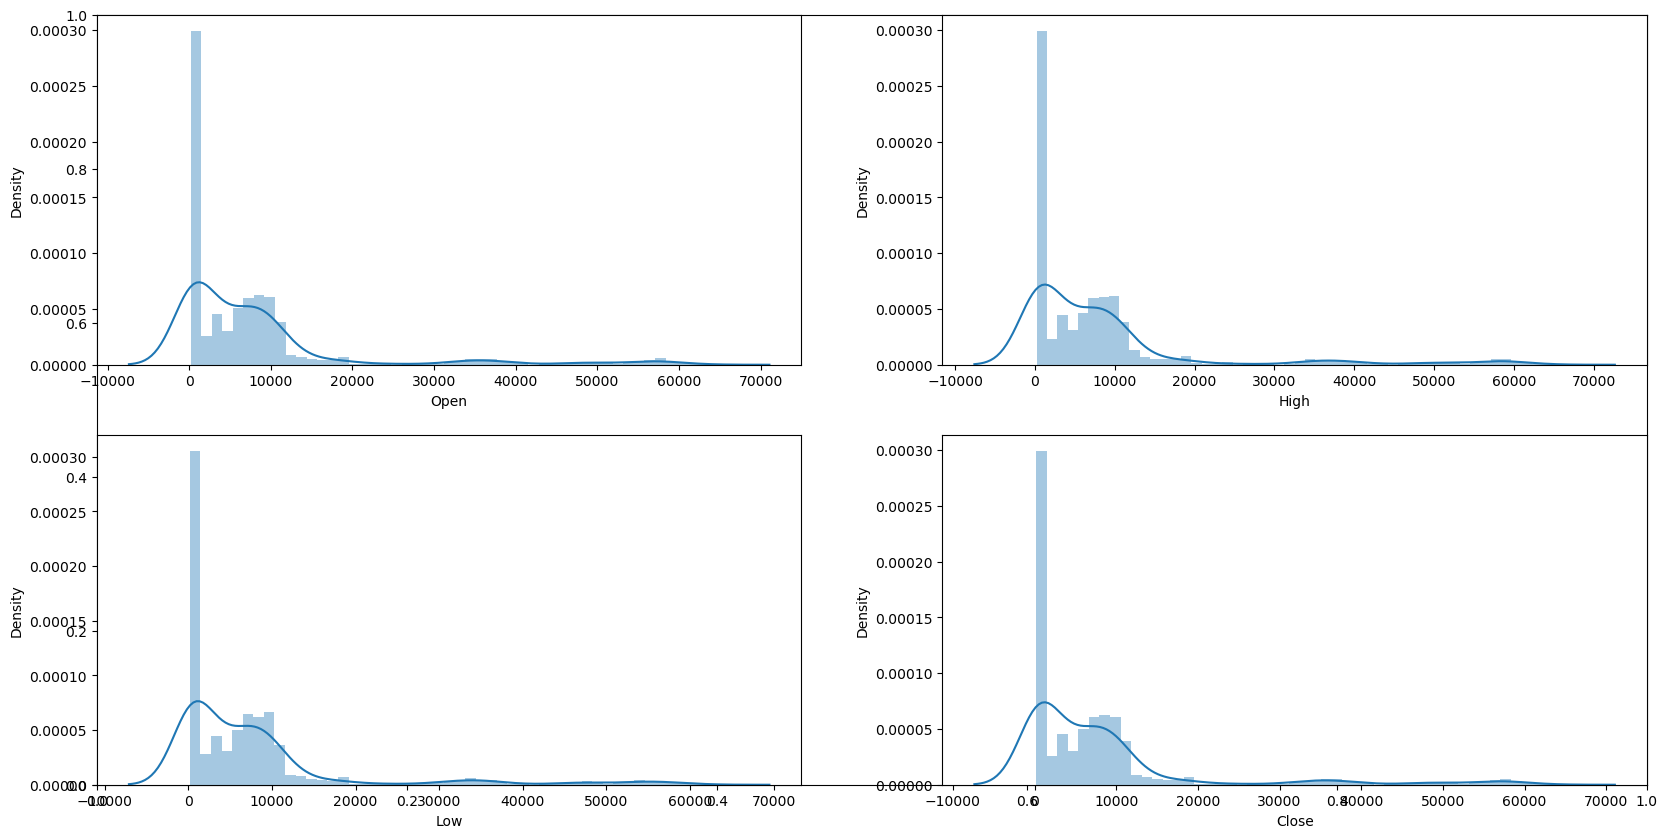

In [10]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(df[col])
plt.show()

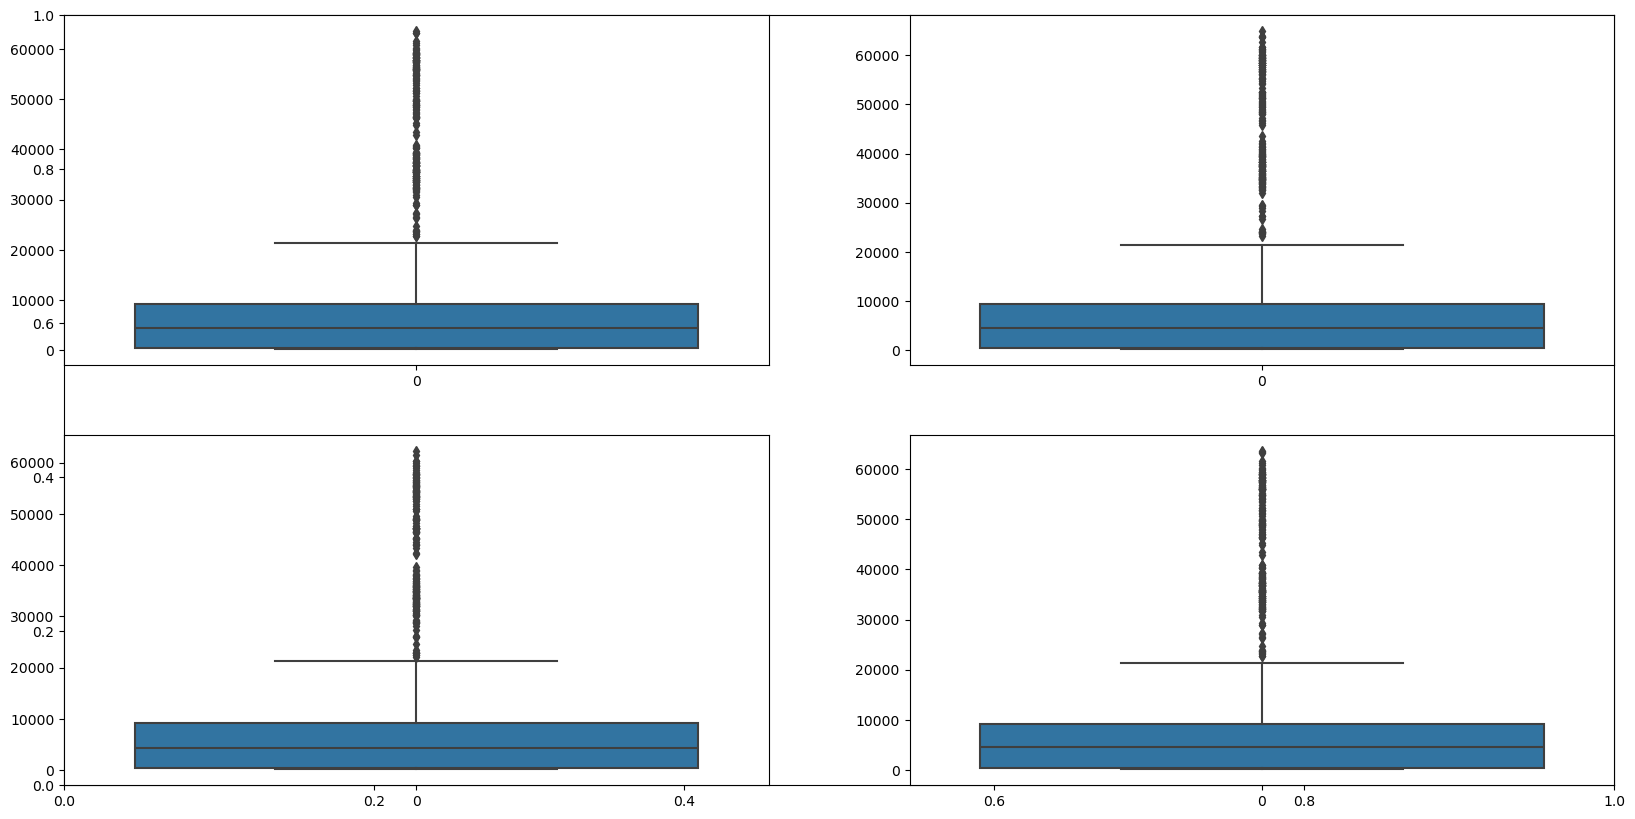

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
   plt.subplot(2,2,i+1)
   sb.boxplot(df[col])
plt.show()

In [12]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21


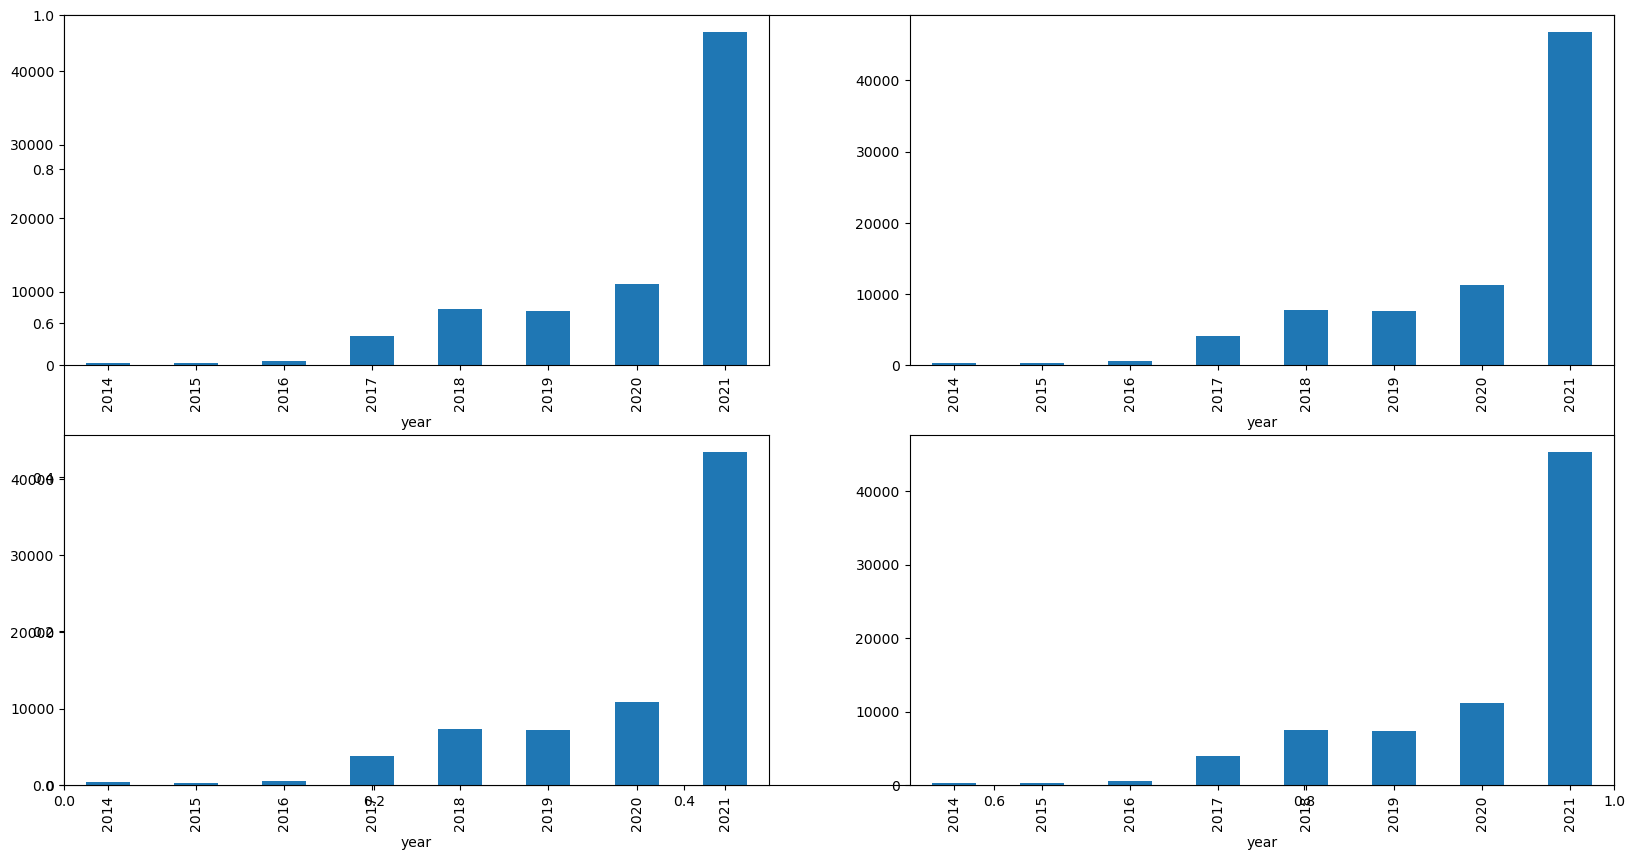

In [13]:
numerical_cols = ['Open', 'High', 'Low', 'Close']
data_grouped = df[numerical_cols].groupby(df['year']).mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,1


In [17]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

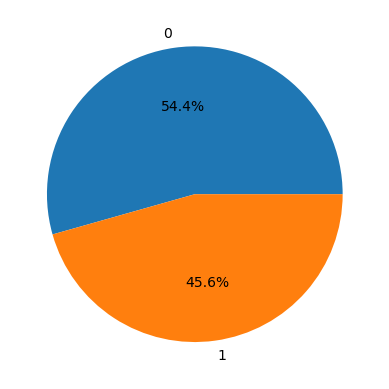

In [18]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

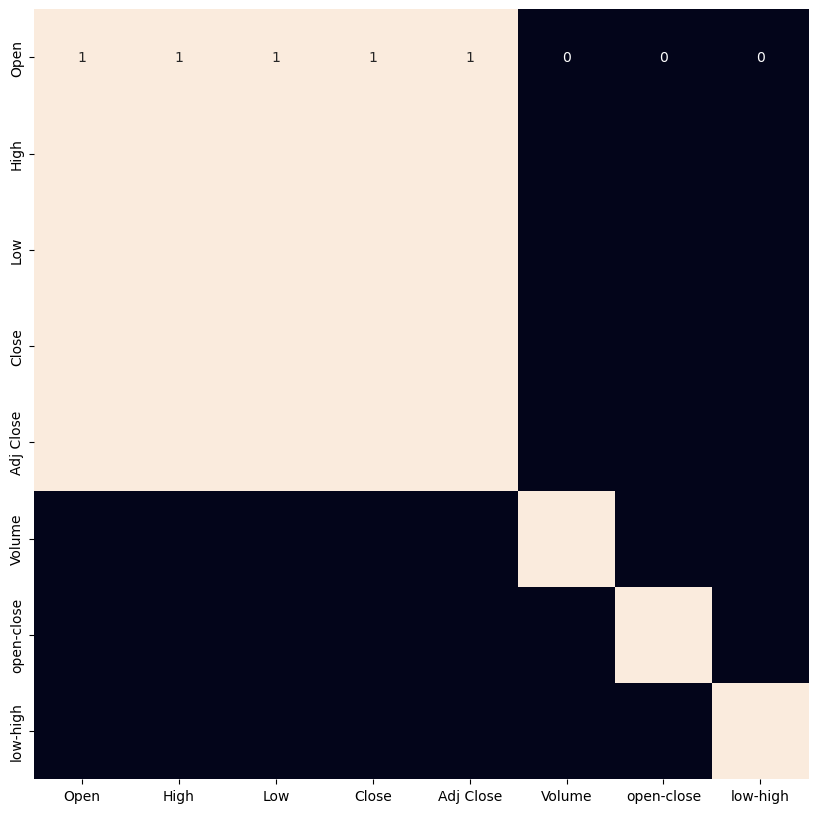

In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df[numerical_cols].corr() > 0.9, annot=True, cbar=False)
plt.show()

In [22]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2235, 3) (249, 3)


In [24]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i, model in enumerate(models):
    model.fit(X_train, Y_train)
    print(f'Model {i+1} : {model}')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))
print()

Model 1 : LogisticRegression()
Training Accuracy :  0.5228433538520261
Validation Accuracy :  0.5596205962059622
Model 2 : SVC(kernel='poly', probability=True)
Training Accuracy :  0.5308819533622946
Validation Accuracy :  0.5045812362885533
Model 3 : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=N

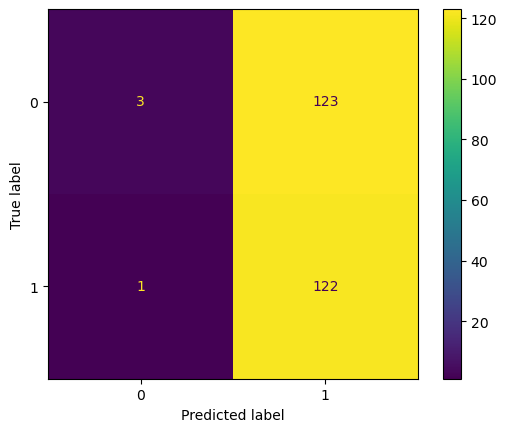

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = models[0].predict(X_valid)
cm = confusion_matrix(Y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()